In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

house_train = pd.read_csv('wk3_kc_house_train_data.csv', dtype = dtype_dict)
house_test = pd.read_csv('wk3_kc_house_test_data.csv', dtype = dtype_dict)
house_valid = pd.read_csv('wk3_kc_house_valid_data.csv', dtype = dtype_dict)

house_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
1,7237550310,20140512T000000,1225000.0,4.0,4.50,5420.0,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760.0,101930.0
2,9212900260,20140527T000000,468000.0,2.0,1.00,1160.0,6000,1,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330.0,6000.0
3,0114101516,20140528T000000,310000.0,3.0,1.00,1430.0,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780.0,12697.0
4,6054650070,20141007T000000,400000.0,3.0,1.75,1370.0,9680,1,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370.0,10208.0


In [2]:
house_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,20150312T000000,323000.0,3.0,2.50,1890.0,6560,2,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390.0,7570.0
1,1175000570,20150312T000000,530000.0,5.0,2.00,1810.0,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360.0,4850.0
2,0016000397,20141205T000000,189000.0,2.0,1.00,1200.0,9850,1,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060.0,5095.0
3,0461000390,20140624T000000,687500.0,4.0,1.75,2330.0,5000,1.5,0,0,...,7,1510,820,1929,0,98117,47.6823,-122.368,1460.0,5000.0
4,7895500070,20150213T000000,240000.0,4.0,1.00,1220.0,8075,1,0,0,...,7,890,330,1969,0,98001,47.3341,-122.282,1290.0,7800.0


In [3]:
house_valid.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
4,1321400060,20140627T000000,257500.0,3.0,2.25,1715.0,6819,2,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238.0,6819.0


Write your own function called ‘polynomial_sframe’ (or otherwise) which accepts an array ‘feature’ and a maximal ‘degree’ and returns an data frame (e.g. SFrame) with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’.

In [4]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = poly_dataframe['power_1'].apply(lambda x: x**power)
    return poly_dataframe

For the remainder of the assignment we will be working with the house Sales data as in the previous notebooks. Load in the data and also sort the sales SFrame by ‘sqft_living’. When we plot the fitted values we want to join them up in a line and this works best if the variable on the X-axis (which will be ‘sqft_living’) is sorted. For houses with identical square footage, we break the tie by their prices.

In [5]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


Make a 1 degree polynomial SFrame with sales[‘sqft_living’] as the the feature. Call it ‘poly1_data’

In [6]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data.head()

,power_1
19452,290.0
15381,370.0
860,380.0
18379,384.0
4868,390.0


Add sales[‘price’] to poly1_data as this will be our output variable.

In [7]:
poly1_data['price'] = sales['price']
poly1_data.head()

,power_1,price
19452,290.0,142000.0
15381,370.0,276000.0
860,380.0,245000.0
18379,384.0,265000.0
4868,390.0,228000.0


Use linear regression compute the regression weights for predicting sales[‘price’] based on the 1 degree polynomial feature ‘sqft_living’. The result should be an intercept and slope.

In [8]:
from sklearn import linear_model
lin_reg_model_1 = linear_model.LinearRegression().fit(np.array([poly1_data['power_1']]).T, np.array([poly1_data['price']]).T)
intercept_1 = lin_reg_model_1.intercept_[0]
slope_1 = lin_reg_model_1.coef_[0][0]
print("intercept: ",intercept_1)
print("slope: ", slope_1)


intercept:  -43580.7430945
slope:  280.623567897


Next use the produce a scatter plot of the training data (just square feet vs price) and add the fitted model. 

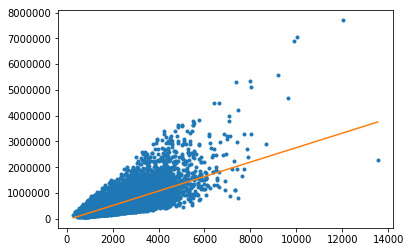

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'],poly1_data['price'],'.', poly1_data['power_1'], lin_reg_model_1.predict(np.array([poly1_data['power_1']]).T),'-')

Now that you have plotted the results using a 1st degree polynomial, try it again using a 2nd degree and 3rd degree polynomial. Look at the fitted lines, do they appear as you would expect?

In [10]:
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
poly2_data['price'] = sales['price']

lin_reg_model_2 = linear_model.LinearRegression().fit(poly2_data[['power_1', 'power_2']], np.array([poly2_data['price']]).T)

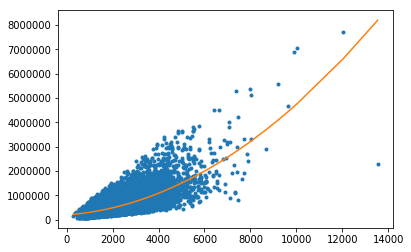

In [11]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.', poly2_data['power_1'], lin_reg_model_2.predict(poly2_data[['power_1','power_2']]),'-')

In [12]:
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
poly3_data['price'] = sales['price']

lin_reg_model_3 = linear_model.LinearRegression().fit(poly3_data.loc[:, poly3_data.columns != 'price'], np.array([poly3_data['price']]).T)

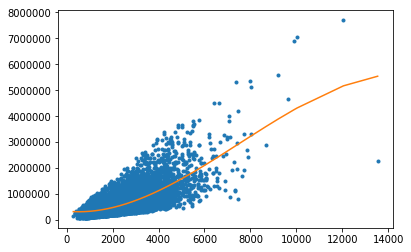

In [13]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.', poly3_data['power_1'], lin_reg_model_3.predict(poly3_data.loc[:, poly3_data.columns != 'price']),'-')

Now try a 15th degree polynomial. Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

In [14]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
poly15_data['price'] = sales['price']

lin_reg_model_15 = linear_model.LinearRegression().fit(poly15_data.loc[:, poly15_data.columns != 'price'], np.array([poly15_data['price']]).T)

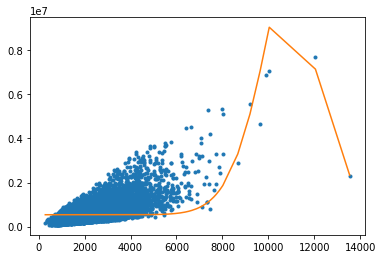

In [15]:
plt.plot(poly15_data['power_1'],poly15_data['price'],'.', poly15_data['power_1'], lin_reg_model_15.predict(poly15_data.loc[:, poly15_data.columns != 'price']),'-')

Estimate a 15th degree polynomial on all 4 sets, plot the results and view the coefficients for all four models.

In [16]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype = dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype = dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype = dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype = dtype_dict)

In [17]:
def get_poly_model(set_data):
    poly15_data = polynomial_dataframe(set_data['sqft_living'], 15)
    poly15_data['price'] = sales['price']
    lin_reg_model_15 = linear_model.LinearRegression().fit(poly15_data.loc[:, poly15_data.columns != 'price'], np.array([poly15_data['price']]).T)
    return poly15_data, lin_reg_model_15

def get_coef(set_data):
    poly15_data, lin_reg_model_15 = get_poly_model(set_data)
    return lin_reg_model_15.coef_

def plot_fitted_line(set_data):
    poly15_data, lin_reg_model_15 = get_poly_model(set_data)
    return plt.plot(poly15_data['power_1'],poly15_data['price'],'.', poly15_data['power_1'], lin_reg_model_15.predict(poly15_data.loc[:, poly15_data.columns != 'price']),'-')

### set 1 data

In [18]:
get_coef(set_1)

array([[ -1.27473947e-91,   7.06142852e-51,  -9.83415251e-57,
          0.00000000e+00,   0.00000000e+00,  -4.60041790e-72,
         -3.49215255e-68,  -2.59876711e-64,  -1.87236221e-60,
         -1.27951085e-56,  -7.99329833e-53,  -4.22427786e-49,
         -1.50977786e-45,   2.34930476e-49,  -9.11604540e-54]])

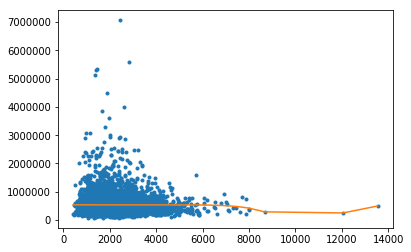

In [19]:
plot_fitted_line(set_1)

### set 2 data

In [20]:
get_coef(set_2)

array([[ -9.79641838e-79,  -2.64840992e-40,   6.68120854e-46,
         -5.01852775e-51,   0.00000000e+00,   0.00000000e+00,
         -1.31618329e-56,  -5.43068693e-53,  -2.07966931e-49,
         -7.06817401e-46,  -1.94745820e-42,  -3.39517132e-39,
          1.25425646e-42,  -1.53806396e-46,   6.25817482e-51]])

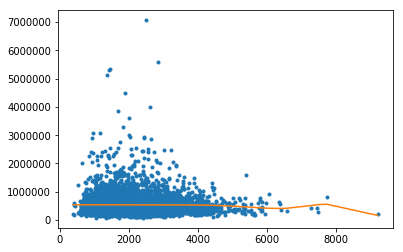

In [21]:
plot_fitted_line(set_2)

### set 3 data

In [22]:
get_coef(set_3)

array([[ -1.52919009e-89,   4.20476794e-50,  -2.54208826e-56,
          0.00000000e+00,   0.00000000e+00,  -2.30600209e-70,
         -1.44435197e-66,  -8.83347744e-63,  -5.20829171e-59,
         -2.89961918e-55,  -1.46889434e-51,  -6.26509613e-48,
         -1.79867173e-44,   3.66552334e-48,  -1.86973734e-52]])

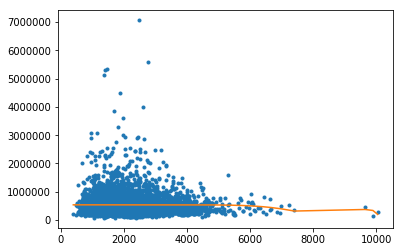

In [23]:
plot_fitted_line(set_3)

### set 4 data

In [24]:
get_coef(set_4)

array([[ -8.28124822e-78,  -1.68914661e-41,   1.28680639e-45,
          3.44265832e-50,  -2.61012179e-54,   0.00000000e+00,
         -7.67451414e-56,  -2.94652891e-52,  -1.04816506e-48,
         -3.30400835e-45,  -8.43051968e-42,  -1.35916079e-38,
          5.70041235e-42,  -7.93767045e-46,   3.66898294e-50]])

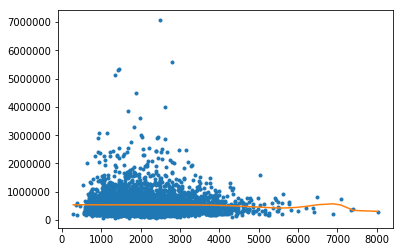

In [25]:
plot_fitted_line(set_4)

# Question 1
Is the sign (positive or negative) for power_15 the same in all four models?

* No

# Question 2
True/False the plotted fitted lines look the same in all four plots
* False

# Question 3
Which degree (1, 2, …, 15) had the lowest RSS on Validation data?

Since the “best” polynomial degree is unknown to us we will use cross validation to select the best degree. 
Now for each degree from 1 to 15:

 *   Build an polynomial data set using training_data[‘sqft_living’] as the feature and the current degree
 *   Add training_data[‘price’] as a column to your polynomial data set
 *   Learn a model on TRAINING data to predict ‘price’ based on your polynomial data set at the current degree
 *   Compute the RSS on VALIDATION for the current model (print or save the RSS)

In [33]:
from sklearn.metrics import mean_squared_error
from scipy import sqrt

RSS_valid = 1e17
power_valid = 1
for power in range(1,16):
    poly_train_data = polynomial_dataframe(house_train['sqft_living'], power)
    poly_valid_data = polynomial_dataframe(house_valid['sqft_living'], power)
    poly_train_data['price'] = house_train['price']
    poly_valid_data['price'] = house_valid['price']
    lin_reg_model = linear_model.LinearRegression().fit(poly_train_data.loc[:, poly_train_data.columns != 'price'], np.array([poly_train_data['price']]).T)
    house_valid_predict = lin_reg_model.predict(poly_valid_data.loc[:, poly_valid_data.columns != 'price'])
    output_str = "Power " + str(power) + " RSS on VALIDATION Data: "
    output_RSS = sqrt(mean_squared_error(poly_valid_data['price'], house_valid_predict))
    print(output_str, output_RSS)
    if output_RSS < RSS_valid:
        RSS_valid = output_RSS
        power_valid = power
    
print("The 'best' polynomial degree is: ", power_valid)
print("The lowest RSS on VALIDATION data is: ", RSS_valid)

Power 1 RSS on VALIDATION Data:  255524.915597
Power 2 RSS on VALIDATION Data:  254478.324651
Power 3 RSS on VALIDATION Data:  254858.402693
Power 4 RSS on VALIDATION Data:  255705.488603
Power 5 RSS on VALIDATION Data:  255350.312817
Power 6 RSS on VALIDATION Data:  242429.450938
Power 7 RSS on VALIDATION Data:  333845.128998
Power 8 RSS on VALIDATION Data:  857696.862883
Power 9 RSS on VALIDATION Data:  2168396.81518
Power 10 RSS on VALIDATION Data:  5068810.85304
Power 11 RSS on VALIDATION Data:  11132860.4755
Power 12 RSS on VALIDATION Data:  23031335.7615
Power 13 RSS on VALIDATION Data:  8890868.08186
Power 14 RSS on VALIDATION Data:  15442146.1611
Power 15 RSS on VALIDATION Data:  26867292.1091
The 'best' polynomial degree is:  6
The lowest RSS on VALIDATION data is:  242429.450938


# Question 4
what is the RSS on TEST data for the model with the degree selected from Validation data?

In [34]:
poly_train_data = polynomial_dataframe(house_train['sqft_living'], power_valid)
poly_test_data = polynomial_dataframe(house_test['sqft_living'], power_valid)
poly_train_data['price'] = house_train['price']
poly_test_data['price'] = house_test['price']
lin_reg_model_test = linear_model.LinearRegression().fit(poly_train_data.loc[:, poly_train_data.columns != 'price'], np.array([poly_train_data['price']]).T)
house_test_predict = lin_reg_model_test.predict(poly_test_data.loc[:, poly_test_data.columns != 'price'])
output_RSS = sqrt(mean_squared_error(poly_test_data['price'], house_test_predict))
print("RSS on TEST data: ", output_RSS)

RSS on TEST data:  246970.927339
